# Optimizers



### Yedam Fortiz 119523

### Yalidt Díaz 141394

In [2]:
#Libraries
import io
import requests
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Usaremos la base de datos: Beijing Multi-Site Air-Quality Data Data Set,
# la cual puede ser obtenida desde https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data
# (revisar la página para más detalles sobre los datos)
# Se ha proporcionado un archivo csv con la información obtenida de la estación
# de monitoreo Aotizhongxin, el cual contiene 35,064 registros.

# El objetivo es poder predecir la concetración de PM2.5 y de PM10 a partir de las
# variables año, mes, día, hora, temperatura, presión, punto de rocío, 
# precipitación y velocidad del viento.

# **Antecedentes**

Se han proporcionado código en Python y unabase de datos sobre mediciones de la calidad de aire de la estación de Aotizhongxin (“DL_03_Optimizers.ipynb” y “PRSA_Aotizhongxin.csv”). Usando como base la información proporcionada, deben construir un modelo de regresión usando redes neuronales profundas tipo MLP (las únicas que conocemos hasta ahora).La base de datos tiene 18 variables (features), de las cuales, 6 corresponden a concentración medida de partículas en el aire (PM2.5, PM10, SO2, NO2, CO, O3), 6 son indicadores climáticos (temperatura, presión atmosférica, punto de rocío, precipitación, dirección del viento, y velocidad del viento), y el resto corresponden a variables propias de la toma del registro (índice numérico, día, hora, lugar, etc). Quizás no todas sean relevantes para nuestro análisis. Utilizaremos los indicadores climáticos como variables independientes  (xi),  y  las  variables  de  la  concentración  de  partículas  en  el  aire  como  variables dependientes (yi).

La base de datos tiene 18 variables (features), de las cuales, 6 corresponden a concentración medida de partículas en el aire (PM2.5, PM10, SO2, NO2, CO, O3), 6 son indicadores climáticos (temperatura, presión atmosférica, punto de rocío, precipitación, dirección del viento, y velocidad del viento), y el resto corresponden a variables propias de la toma del registro (índice numérico, día, hora, lugar, etc). Quizás no todas sean relevantes para nuestro análisis. Utilizaremos los indicadores climáticos como variables independientes  (xi),  y  las  variables  de  la  concentración  de  partículas  en  el  aire  como  variables dependientes (yi).

# Part 1: Load data into Colab

In [4]:
#URL to read data
url = "https://raw.githubusercontent.com/Yalidt/DeepLearning/main/MiniProyectos/Datos_MP_02_PRSA_Aotizhongxin.csv?raw=true"
rurl=requests.get(url).content

# Read data to pandas
df = pd.read_csv(io.StringIO(rurl.decode('utf-8')))

In [5]:
df.dropna(inplace=True)
df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


# Part 2: Format data and split it into numpy arrays

In [6]:
# AUX function to put categorical data into one-hot encoding format
from sklearn.preprocessing import OneHotEncoder
def winddir_to_categorical(winddir):
  enc = OneHotEncoder(sparse=False)
  WD = enc.fit_transform(winddir)
  print("== categories:", enc.categories_, "==")
  return WD

== categories: [array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)] ==
Input values X with shape (31815, 25). With values
 min = [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00 -1.680e+01  9.859e+02
 -3.530e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00]
 mean = [2.01471491e+03 6.40188590e+00 1.55785636e+01 1.16247996e+01
 1.37756108e+01 1.01180038e+03 3.24110640e+00 6.82351092e-02
 1.72047148e+00 7.51532296e-02 1.12619833e-01 5.05421971e-02
 5.86830112e-02 1.43988685e-01 6.99984284e-02 4.45073079e-02
 5.37482320e-02 3.81581015e-02 3.91010530e-02 2.96715386e-02
 6.03488920e-02 9.57724344e-02 3.36005029e-02 3.14002829e-02
 6.27062706e-02]
 stdd = [ 1.16251735  3.41679338  8.79481542  6.92676545 11.36885668 10.33870697
 13.66764783  0.83747595  1.20422141  0.

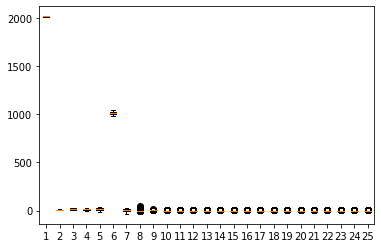

In [7]:
# Extract input features and convert them to a numpy array
X = df[['year', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM' ]].to_numpy()
WD = winddir_to_categorical(df[['wd']])
X = np.concatenate((X, WD), axis=1)

print(f"Input values X with shape {X.shape}. With values")


print(f" min = {X.min(axis=0)}")
print(f" mean = {X.mean(axis=0)}")
print(f" stdd = {X.std(axis=0)}")
print(f" max = {X.max(axis=0)}")

plt.boxplot(X)
plt.show()

[2.01471491e+03 6.40188590e+00 1.55785636e+01 1.16247996e+01
 1.37756108e+01 1.01180038e+03 3.24110640e+00 6.82351092e-02
 1.72047148e+00 7.51532296e-02 1.12619833e-01 5.05421971e-02
 5.86830112e-02 1.43988685e-01 6.99984284e-02 4.45073079e-02
 5.37482320e-02 3.81581015e-02 3.91010530e-02 2.96715386e-02
 6.03488920e-02 9.57724344e-02 3.36005029e-02 3.14002829e-02
 6.27062706e-02]
 min = [-1.47517312 -1.58098114 -1.65763156 -1.67824358 -2.68941826 -2.50518608
 -2.81987851 -0.0814771  -1.42870029 -0.28506174 -0.35624812 -0.23072212
 -0.24968258 -0.41013273 -0.27434832 -0.21582511 -0.23833001 -0.19917808
 -0.20172298 -0.17486812 -0.2534261  -0.32544784 -0.1864638  -0.18005062
 -0.25865307]
 mean = [ 2.53620974e-13 -5.20961380e-15 -1.40856471e-15 -1.27022216e-17
 -1.02426039e-14 -1.09446446e-12 -5.83953233e-16  2.22055074e-15
  1.58522417e-14  1.72582712e-14 -4.05981498e-15  1.36230193e-14
  1.06470074e-14 -1.71220957e-14 -1.80721207e-14  1.59185533e-15
 -1.52863037e-14 -9.66857167e-16 -1.

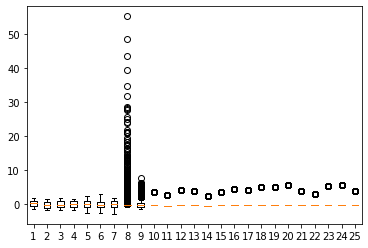

In [8]:
# Normalize (zero-center) and standardize (scale) input data
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X = scalerX.fit_transform(X)
print(scalerX.mean_)

print(f" min = {X.min(axis=0)}")
print(f" mean = {X.mean(axis=0)}")
print(f" stdd = {X.std(axis=0)}")
print(f" max = {X.max(axis=0)}")

plt.boxplot(X)
plt.show()

Target values Y with shape (31815, 2). With values
 min = [3. 2.]
 mean = [81.86363036 58.97633192]
 stdd = [80.44822547 37.06080184]
 max = [713. 290.]


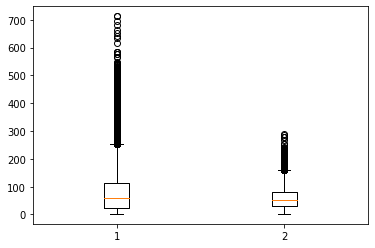

In [9]:
# Extract output features and convert them to a numpy array
Y = df[['PM2.5', 'NO2']].to_numpy()

print(f"Target values Y with shape {Y.shape}. With values")
print(f" min = {Y.min(axis=0)}")
print(f" mean = {Y.mean(axis=0)}")
print(f" stdd = {Y.std(axis=0)}")
print(f" max = {Y.max(axis=0)}")

plt.boxplot(Y)
plt.show()

[81.86363036 58.97633192]
 min = [-0.98030292 -1.53737451]
 mean = [-3.21603501e-17  1.42934889e-17]
 stdd = [1. 1.]
 max = [7.84524911 6.23363923]


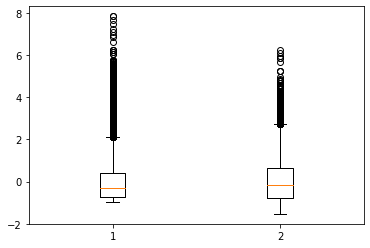

In [10]:
# Normalize (zero-center) and standardize (scale) output data
scalerY = StandardScaler()
Y = scalerY.fit_transform(Y)
print(scalerY.mean_)

print(f" min = {Y.min(axis=0)}")
print(f" mean = {Y.mean(axis=0)}")
print(f" stdd = {Y.std(axis=0)}")
print(f" max = {Y.max(axis=0)}")

plt.boxplot(Y)
plt.show()

In [11]:
# Split data into train+val and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30224, 25)
(30224, 2)
(1591, 25)
(1591, 2)


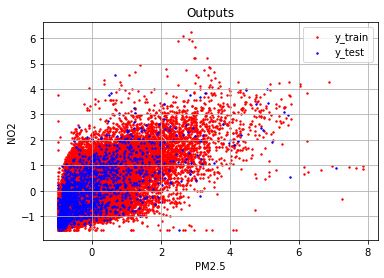

In [12]:
# Plot y_test
# Esta gráfica es para ver sólo si los sets de entrenamiento y test cubren las mismas
# áreas (¿tienen la misma distribución?). No se espera que los puntos coincidan ya que
# son dos sets distintos.
plt.scatter(y_train[:, 0], y_train[:, 1], c='r', s=2, label='y_train')
plt.scatter(y_test[:, 0], y_test[:, 1], c='b', s=2, label='y_test')

plt.legend()
plt.grid(True)
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.title('Outputs')
plt.show()

# Part 3: Create DNN model and train it

In [13]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [14]:
# Create a Deep Network
DNN = Sequential()
DNN.add(Input(shape=X.shape[1:], name='INPUT'))

DNN.add(Dense(units=256, activation='relu'))
DNN.add(Dense(units=512, activation='relu'))
DNN.add(Dense(units=1024, activation='relu'))
DNN.add(Dense(units=512, activation='relu'))
DNN.add(Dense(units=256, activation='relu'))

DNN.add(Dense(units=Y.shape[1], activation='linear', name='OUTPUT'))

DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
OUTPUT (Dense)               (None, 2)                 514       
Total params: 1,320,194
Trainable params: 1,320,194
Non-trainable params: 0
______________________________________________

In [15]:
# Define training parameters
#from tensorflow.keras.optimizers import SGD
#sgd = SGD(learning_rate=0.02, momentum=0.6)
#DNN.compile(optimizer=sgd, loss='mse')
DNN.compile(optimizer='adam', loss='mse')

In [ ]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=32, epochs=200, verbose=1, validation_split=0.1, shuffle=True)

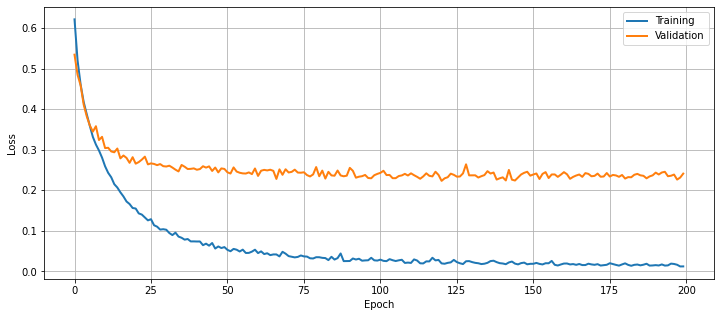

In [17]:
# Plot loss
plt.figure(figsize=(12, 5))
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [18]:
# Generalization metric (opcional)
min_loss = np.min([DNN.history.history['loss'][-1], DNN.history.history['val_loss'][-1]])
max_loss = np.max([DNN.history.history['loss'][-1], DNN.history.history['val_loss'][-1]])
general_loss = (max_loss - min_loss) / max_loss
print(f"Generalization loss: {general_loss:6.4f}%")

Generalization loss: 0.9494%


In [19]:
# Compute test loss
loss_test = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", loss_test)

Test loss: 0.22918909788131714


In [20]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)

(1591, 2)


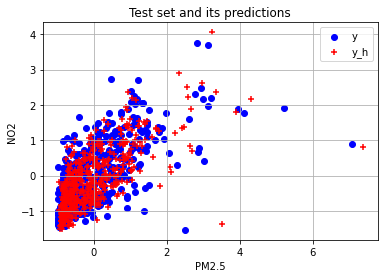

In [21]:
# Plot y_test_hat
indx = np.random.permutation(len(y_test))[:500]
plt.scatter(y_test[indx, 0], y_test[indx, 1], c='b', label='y')
plt.scatter(y_test_hat[indx, 0], y_test_hat[indx, 1], c='r', marker='+', label='y_h')

plt.legend()
plt.grid(True)
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.title('Test set and its predictions')
plt.show()

1) Identificar cuáles de las variables dependientes son predecibles y cuáles no. <br>  

Sugerencia: 
+ Los dataframes de pandas tienen la función corr(), la cual calcula la correlación entre variables.

In [ ]:
#df

In [95]:
# Air particles as Yi variables
Y = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]
print(f"Variable predicted values with shape {Y.shape}")

# Climate indicators as Xi variables
features = df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
WD = winddir_to_categorical(df[['wd']])  #One Hot encoding for wd variable
X= np.concatenate((features, WD), axis=1)
names = ['TEMP','PRES','DEWP','RAIN','WSPM','NNW','N','NW','NNE','ENE','E','NE','W','SSW','WSW','SE','WNW','SSE','ESE','S','SW']
df_x = pd.DataFrame(X)
df_x.columns = [names]
print(f"Features X values with shape {df_x .shape}")

Variable predicted values with shape (31815, 6)
== categories: [array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)] ==
Features X values with shape (31815, 21)


In [96]:
def correlation(Y,features,threshold, var='x'):
    """Function to get correlation between independent variables and dependent variables to 
    get the most predictible dependent variables or independent variables i.e those with highest correlation
    """
    # Get columns names for Yi's
    names_x = list(features.columns)
    # Get columns names for Yi's
    names_y = list(Y.columns)

    #Concatenate to single df
    df_c = pd.concat([Y, features], axis=1)

    #Get matrix correlation
    corr_matrix = df_c.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    if var == 'x':
      x_df = upper [names_x]
      vars = [column for column in x_df.columns if any(x_df[column] > threshold)]

    else:
      y_df = upper [names_y]
      vars = [column for column in y_df.columns if any(y_df[column] > threshold)]

    return vars

In [97]:
predictable_vars = correlation(Y, df_x,.65, var='y')
predictable_vars

['PM10', 'NO2', 'CO']

2) Identificar cuáles de las variables independientes son relevantes para el pronóstico de las variables dependientes identificadas previamente.<br> 

In [98]:
y_selected = df[['PM10', 'NO2', 'CO']]

x_vars = correlation(y_selected, df_x,.30, var='x')
x_vars

[('PRES',), ('DEWP',), ('WSPM',)]

In [99]:
# Scaling variables
scalerX = StandardScaler()
scalerY = StandardScaler()
X_features = pd.DataFrame(scalerX.fit_transform(features))
names_xscal = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
X_features.columns = [names_xscal]

Y_scal = pd.DataFrame(scalerY.fit_transform(Y))
names_yscal = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
Y_scal.columns = [names_yscal]
X = np.concatenate((X_features, WD), axis=1)

names = ['TEMP','PRES','DEWP','RAIN','WSPM','NNW','N','NW','NNE','ENE','E','NE','W','SSW','WSW','SE','WNW','SSE','ESE','S','SW']
df_x_scal = pd.DataFrame(X)
df_x_scal.columns = [names]

In [100]:
predictable_vars = correlation(Y_scal, df_x_scal,.65, var='y')
predictable_vars

[('PM10',), ('NO2',), ('CO',)]

In [101]:
y_selected = df[['PM10', 'NO2', 'CO']]
y_sel_scal = pd.DataFrame(scalerY.fit_transform(y_selected))
names_y_scal = ['PM10', 'NO2', 'CO']
y_sel_scal.columns = [names_y_scal]

x_vars = correlation(y_sel_scal, df_x_scal,.30, var='x')
x_vars

[('TEMP',), ('PRES',), ('DEWP',), ('WSPM',)]

3) Para mantener el problema como uno de regresión multivariada, selecciona al menos 3 de las variables independientes para definir los vectores de entrada, y mantén al menos 2 variables dependientes para definir los vectores de salida.<br> 

R. Con el análisis de las correlaciones se decidió tomar como inputs variables TEMP, PRES, DEWP y WSPM, por otra parte como outputs elegimos PM10, NO y CO.

4) Con las variables dependientes e independientes identificadas, úsalas para construir un modelo de regresión tipo MLP. Inicia con un optimizador fijo, y modifica primero sólo la arquitectura para obtener el mejor resultado posible. <br>

Retos:
+ Prueba con varias arquitecturas de entre 2 y 6 capas.
+ Prueba con varios números de neuronas en cada capa, entre 32 y 2048.
+ Prueba diferentes tamaños de lote. Mantén fijas 100 épocas.

In [110]:
# Moodeling part will be implemented with scaled variables to get better performance
x_model = df_x_scal[x_vars]
print(x_model.head(4))
y_model = y_sel_scal
print(y_model.head(4))

       TEMP      PRES      DEWP      WSPM
0 -1.273269  1.083270 -1.612648  2.225113
1 -1.308453  1.102615 -1.568749  2.474236
2 -1.308453  1.131632 -1.568749  3.221607
3 -1.334841  1.228356 -1.656547  1.145577
       PM10       NO2        CO
0 -1.121688 -1.402461 -0.781974
1 -1.079006 -1.402461 -0.781974
2 -1.089676 -1.321513 -0.781974
3 -1.100347 -1.294530 -0.781974


In [111]:
# Set train and test
x_train, x_test, y_train, y_test = train_test_split(x_model, y_model, test_size=0.05)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30224, 4)
(30224, 3)
(1591, 4)
(1591, 3)


In [114]:
def get_model(n):
  """Function to get the model arquitecture to try the same model but with different arquitecture
    """
  models = n
  for model in range(models):
    if model == 1 or model == 2:
      #Model 1 or 2  
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=256, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))

    elif model == 3:
      #Model 3
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=32, activation='relu'))
      DNN.add(Dense(units=2048, activation='relu'))
      DNN.add(Dense(units=1024, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))

    elif model == 4:
      #Model 4
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=32, activation='relu'))
      DNN.add(Dense(units=2048, activation='relu'))
      DNN.add(Dense(units=1024, activation='relu'))
      DNN.add(Dense(units=32, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))

    elif model == 5:

      #Model 5
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=32, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))

    else:
      #Model 6
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=1024, activation='relu'))
      DNN.add(Dense(units=32, activation='relu'))
      DNN.add(Dense(units=2048, activation='relu'))
      DNN.add(Dense(units=1024, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))

    DNN.compile(optimizer='adam', loss='mse')

    return DNN

In [115]:
def eval_model(y_train, x_train):

  bs = [32, 16, 8, 32, 16, 32]
  models = [1,2,3,4,5,6]
  loss_train = []
  loss_validation = []
  loss_test = []
  model = []

  for md,batch_s in zip(models,bs):
    model.append(md)
    #Train model
    DNN = get_model(md)
    history = DNN.fit(x=x_train, y=y_train, batch_size=batch_s, epochs=100, verbose=1, validation_split=0.1, shuffle=True)
    # Compute test loss 
    loss_train.append(DNN.history.history['loss'][-1])
    loss_validation.append(DNN.history.history['val_loss'][-1])
    loss_test.append(DNN.evaluate(x=x_test, y=y_test, verbose=False))

    # Reset session
    tf.keras.backend.clear_session()

  table={'model':model, 'loss_train':loss_train,'loss_validation':loss_validation,'loss_test':loss_test}       
  results=pd.DataFrame(table)
    
  return results

In [ ]:
#Prueba para guardar la corrida como Pickle
evaluations = eval_model(y_train, x_train)

In [117]:
import pickle

filename = 'models.pkl'
pickle.dump(evaluations, open(filename, 'wb'))
#pd.read_pickle('models.pkl')

In [118]:
pd.read_pickle('models.pkl')

,model,loss_train,loss_validation,loss_test
0,1,0.432338,0.588341,0.619752
1,2,0.491213,0.585775,0.595029
2,3,0.555434,0.568445,0.615091
3,4,0.453581,0.600387,0.609147
4,5,0.479229,0.592444,0.624455
5,6,0.436567,0.592396,0.640871


5) Una vez obtenido el mejor resultado posible con el optimizador fijo y la arquitectura seleccionada, evalúa cuál es el impacto de variar el optimizador manteniendo fija la arquitectura.

+ Prueba al menos 6 optimizadores. Revisa la documentación de tensorflow y keras para ver detalles de cómo utilizarlos.

In [126]:
def get_model_optim(n):
  """Function to validate the optimizer of the net
    """ 
  optimizador = n
  for optim in (optimizador):
    if optim == 1 :
      #ADAM
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=256, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))
      DNN.compile(optimizer='adam', loss='mse')

    elif optim == 2:
      #ADAMAX
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=256, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))
      DNN.compile(optimizer='adamax', loss='mse')

    elif optim == 3:
      #RMS
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=256, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))
      DNN.compile(optimizer='rmsprop', loss='mse')

    elif optim == 4:

      #ADAGRAD
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=256, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))
      DNN.compile(optimizer='adagrad', loss='mse')

    elif optim == 5:
      #ADA DELTA
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=256, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))
      DNN.compile(optimizer='adadelta', loss='mse')

    else:
      #SGD
      DNN= Sequential()
      DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

      DNN.add(Dense(units=256, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=512, activation='relu'))
      DNN.add(Dense(units=256, activation='relu'))

      DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))
      DNN.compile(optimizer='sgd', loss='mse')

    return DNN

In [127]:
def eval_optimizer(y_train, x_train):

  models = [1,2,3,4,5,6]
  loss_train = []
  loss_validation = []
  loss_test = []
  model = []

  for md in zip(models):
    model.append(md)
    #Train model
    DNN = get_model_optim(md)
    history = DNN.fit(x=x_train, y=y_train, batch_size=16, epochs=100, verbose=1, validation_split=0.1, shuffle=True)
    # Compute test loss 
    loss_train.append(DNN.history.history['loss'][-1])
    loss_validation.append(DNN.history.history['val_loss'][-1])
    loss_test.append(DNN.evaluate(x=x_test, y=y_test, verbose=False))

    # Reset session
    tf.keras.backend.clear_session()

  table={'model':model, 'loss_train':loss_train,'loss_validation':loss_validation,'loss_test':loss_test}       
  results=pd.DataFrame(table)
    
  return results

In [ ]:
eval_optim = eval_optimizer(y_train, x_train)

In [130]:
filename = 'models_optim.pkl'
pickle.dump(eval_optim, open(filename, 'wb'))
#pd.read_pickle('models_optim.pkl')

In [ ]:
# Modelo ganador 
DNN= Sequential()
DNN.add(Input(shape=x_train.shape[1:], name='INPUT'))

DNN.add(Dense(units=256, activation='relu'))
DNN.add(Dense(units=512, activation='relu'))
DNN.add(Dense(units=512, activation='relu'))
DNN.add(Dense(units=256, activation='relu'))

DNN.add(Dense(units=y_train.shape[1], activation='linear', name='OUTPUT'))
DNN.compile(optimizer='adamax', loss='mse')

# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=16, epochs=100, verbose=1, validation_split=0.1, shuffle=True)

# Reporte

1. *Cuáles variables de entrada y salida se seleccionaron para el ejercicio. Justifica su selección.* <br>

R. Se obtuvó la correlación entre las variables independientes y dependientes para despuest obtener aquellas variables dependientes que tuvieran mayor correlación y esto nos ayuda a identificar que son las más predecibles porque tiene una correlación alta (se puso como *threshold .95*) en valor absoluto con las caracterísiticas elegidas. Se obtuvo como variables **Y = ['PM10', 'NO2', 'CO']**. De igual manera se hizo lo mismo para la selección de las variables X, una vez elegidas las Y'is y las variables X'is que se quedaron para modelar con un *threshold del .30* fueron **X= ['PRES','DEWP','RAIN','WSPM']** <br>

Sin embargo, cuando escalamos los datos si cambiaron las variables a **X= ['TEMP','PRES','DEWP','RAIN','WSPM']** y utilizando el mismo *threshold*, es decir nos aumentó una variable input y fue la temperatura.

2. *Si se utilizó algún tipo de escalamiento o normalización de los datos de entrada y/o de salida.*<br>

R. Si se utilizó el escalamiento de *sklearn* para que se estandarizaran los datos (quita media y divide entre desviación estandar), decidimos escalara todas las variables excepto el *feature* WD que se convirtio en *One hot encoding* porque no era necesaria ahí la estandarización. En las demás variables (inputs y outputs) si lo hicimos para eliminar el ruido que pudieran agregar al modelo. Se observó que al hacer la seleccion de variables hubo un cambio en los inputs utilizando el mismo *threshold* únicamente con la variante de datos no estandarizados vs datos estandarizados.

3. *Una tabla con el desempeño de, al menos, 5 arquitecturas evaluadas usando el optimizador fijo.*<br>




In [119]:
pd.read_pickle('models.pkl')

,model,loss_train,loss_validation,loss_test
0,1,0.432338,0.588341,0.619752
1,2,0.491213,0.585775,0.595029
2,3,0.555434,0.568445,0.615091
3,4,0.453581,0.600387,0.609147
4,5,0.479229,0.592444,0.624455
5,6,0.436567,0.592396,0.640871


R. De acuerdo con la tabla de evaluaciones se obtuvo que el mejor modelo es el número 2 porque es el tiene menor pérdida para la predicción de las 3 variables objetivo. Esta arquitectura contiene lo siguiente: 1 capa de input, 4 capas ocultas y 1 capa de salida. Con 256, 512, 512 y 256 neuronas en las 4 capas ocultas respectivamente, y con un *batch size* de 16.


4. *Una tabla con el desempeño obtenido con la arquitectura fija y, al menos, 6 optimizadores.*<br>




In [131]:
pd.read_pickle('models_optim.pkl')

,model,loss_train,loss_validation,loss_test
0,"(1,)",0.405322,0.611365,0.628110
1,"(2,)",0.452410,0.573941,0.605637
2,"(3,)",0.572777,0.578906,0.627453
3,"(4,)",0.640623,0.620448,0.676201
4,"(5,)",0.630123,0.606328,0.662581
5,"(6,)",0.558375,0.562106,0.615570


R. De acuerdo con la tabla de resultados, se obtuvo que el mejor optimizador fue el 2, el cual corrresponde al ADAMAX, que de acuerdo a lo comentado en la clase tanto ADAMAX y ADAM son los más utilizados en las aplicaciones por sus mejores desempeños.

5.*Grafica las curvas de desempeño vs época para el mejor modelo.*<br>


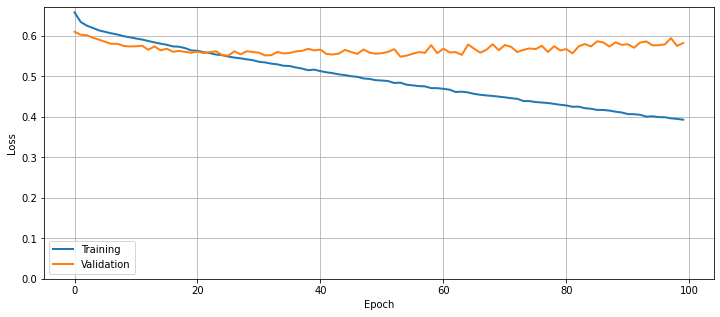

In [136]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.ylim(ymin=0)
plt.show()

El desempeño del modelo muestra que no estamos disminuyendo correctamente la pérdida, por lo que se sugiere que se exploren más combianciones de capas, neuronas y *batch size*. 

6.*Incluye  una  explicación sobre  el  efecto  que  hayan  notado  en  el  cambio  de  los  distintos hiperparámetros explorados.*<br>
 
R. 
+ Notamos que para este problema los modelos que tenían mejor desempeño fueron aquellos con menores capas profundas, entre 2 y 4.
+ Con un número pequeño de *batch size* el resultado fue invariante.
+ Se notó un desempeño distinto al pronosticar 3 variables de respecto al modelo base de la clase de 2 variables predicitivas; para el primero se obtuvo un error en test alrededor de .55, mientras que para el otro caso de 2 variables fue de .20.



7.*Comenta tus conclusiones.* <br>
R. El modelo bajo distintas arquitecturas muestra un resultado similar apesar de cambiar el número de capas, neuronas y *batch size*. Adicionalmente, probamos con diferentes número de variables independientes(x) y se obtuvieron desempeños similares no muy asertivos.
